# Introduction

In the class of machine learning approaches that are based on tree-like decision makers, many improved algorithms have been developed over the past two decades. We will go through three noteworthy designs that build on the idea of ensembles. The general idea is to train multiple models and combine them in various ways to improve performance.

There are two primary ways of doing this when it comes to decision trees. The first is to average the output of multiple trees which limits the variance of the output given the central limit theorem. The second way is to build trees in sequence and use the output of each one to reduce the bias in the next one.

# Bagging Regressor
A Bagging model works by dividing a dataset, training one tree per subset, and averaging the results. There are variants of the Bagging approach with distinct names determined by how the data is divided (i.e. Pasting, Bagging, Random Subspaces, Random Patches, etc...).

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split

from sklearn.datasets import fetch_covtype

In [13]:
# covtype is a moderately complex "real world" dataset
# it might take a minute to download the dataset

covtype = fetch_covtype()

# Let's split it 
x, xt, y, yt = train_test_split(covtype.data, covtype.target, test_size = 0.20)

print(covtype.DESCR)

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30×30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

    =================   ============
    Classes                        7
    Samples total             581012
    Dimensionality                54
    Features                     int
    =================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like 'Bunch' object
with the feature matrix in the ``data`` member
and the target values in ``target``. If optional a

In [14]:
c = fetch_covtype(as_frame=True)

In [15]:
c.data


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# now that datasets are bigger, training takes marginally longer
# we will intentionally restrict depth to make differences more apparent

m = DecisionTreeClassifier(max_depth=15)

m.fit(x, y)

ŷ = m.predict(xt)
accuracy_score(yt, ŷ)

0.8505116046917893

In [18]:
confusion_matrix(yt, ŷ)

array([[34617,  7559,     0,     0,    18,    10,   226],
       [ 4762, 51234,   228,     0,   101,   226,    22],
       [    5,   422,  6131,    46,     8,   471,     0],
       [    0,     0,   114,   425,     0,    34,     0],
       [   57,  1062,    30,     0,   722,     3,     0],
       [    4,   675,   602,    20,     2,  2189,     0],
       [  593,    71,     0,     0,     0,     0,  3514]])

Text(0.5, 1.0, 'Mean AUC 0.85')

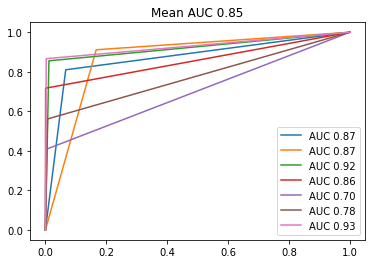

In [11]:
# compute ROC curves for each class and plot them

plt.close('all')

ytb = label_binarize(yt, classes=np.union1d(y, yt))
ŷb = label_binarize(ŷ, classes=np.union1d(y, yt))

fig, ax = plt.subplots()
area = []
for i in range(len(np.union1d(y, yt))):
    fpr, tpr, _ = roc_curve(ytb[:,i], ŷb[:,i])
    a = auc(fpr, tpr)
    area.append(a)
    plt.plot(fpr, tpr, label='AUC %0.2f' % a)

plt.legend(loc="lower right")
plt.title("Mean AUC %0.2f" % np.mean(area))

In [19]:
# we are training the same tree but using bagging
# set the number of estimators to the number of CPUs on your computer

mb = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=15),
                       n_estimators=32,
                       verbose=1,
                       n_jobs=-1)

mb.fit(x, y)

ŷ = mb.predict(xt)
accuracy_score(yt, ŷ)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:   34.8s remaining:  1.7min
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   35.4s finished
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    1.0s remaining:    3.1s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.2s finished


0.8849427295336609

Text(0.5, 1.0, 'Mean AUC 0.87')

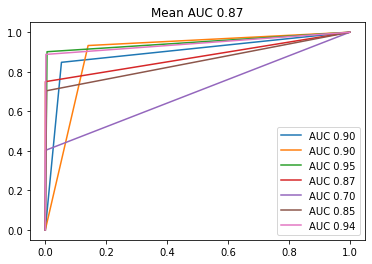

In [7]:
# compute ROC curves for each class and plot them

plt.close('all')

ytb = label_binarize(yt, classes=np.union1d(y, yt))
ŷb = label_binarize(ŷ, classes=np.union1d(y, yt))

fig, ax = plt.subplots()
area = []
for i in range(len(np.union1d(y, yt))):
    fpr, tpr, _ = roc_curve(ytb[:,i], ŷb[:,i])
    a = auc(fpr, tpr)
    area.append(a)
    plt.plot(fpr, tpr, label='AUC %0.2f' % a)

plt.legend(loc="lower right")
plt.title("Mean AUC %0.2f" % np.mean(area))

# Random Forest
In random forests each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set. Furthermore, when splitting each node during the construction of a tree, the best split is found either from all input features or a random subset.

Random forest is a supervised machine learning algorithm used to solve classification as well as regression problems. It is a type of ensemble learning technique in which multiple decision trees are created from the training dataset and the majority output from them is considered as the final output.

Random forest is a very popular technique due to its simplicity and ability to produce robust results.

How Random Forest Works Random Forest works on the Bootstrap Aggregation (Bagging) technique of Ensemble learning –

Here, first of all, multiple training data is created by sampling data from the training set which is known as bootstrapping or bagging.

For example, if we have a data set (a,b,c,d,e,f,g,h,i,j) then the following training set can be obtained with bootstrap –

(a,f,d,j,h,c) (b,g,a,i,c,f) (i,d,c,e,a,d) (b,h,g,h,a,b)

You may notice here that the same data can appear multiple times across the training sets because we are doing random sampling with replacement.

ii) The leftover training data that has not been added in the bootstrapped data can be used to find the random forest accuracy. This is called the out-of-bag-datasets.

iii) Next, multiple decision trees are trained on each of these datasets. Instead of taking all features, we can add more variation by randomly selecting some features of the dataset for each of the decision trees.

iv) The output of each decision tree is aggregated to produce the final output. For classification, the aggregation is done by choosing the majority vote from the decision trees for classification. In the case of regression, the aggregation can be done by averaging the outputs from all the decision trees.

e.g. if 9 decision trees are created for the random forest classifier, and 6 of them classify the outputs as class 1 and the remaining 3 classify output as class 0, then the final classification will be chosen as class 1, based on the maximum vote it got.

Advantages of Random Forest Some of the advantages of random forest are listed below.

Random forests have much higher accuracy than the single decision tree. It has low bias and low variance. Can be used for both classification and regression. Handel missing values very well and gives a good accuracy on missing values dataset. Due to its randomness doesn’t overfit the model, thus gives a good prediction on unseen datasets. Large datasets having high dimensionality can be handled using random forest. Disadvantages of Radom Forest There are several disadvantages of using a random forest. Some of them are listed below.

The random forest needs good computational resources to train them efficiently. At times random forest regression fails to produce accurate results. It behaves like a black box where we don’t have much control over the output it produces as it lacks interpretability.

## In scikit learn we have three options

In random forests (see RandomForestClassifier and RandomForestRegressor classes), each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set.

Furthermore, when splitting each node during the construction of a tree, the best split is found either from all input features or a random subset of size max_features. (See the parameter tuning guidelines for more details).

The purpose of these two sources of randomness is to decrease the variance of the forest estimator. Indeed, individual decision trees typically exhibit high variance and tend to overfit. The injected randomness in forests yield decision trees with somewhat decoupled prediction errors. By taking an average of those predictions, some errors can cancel out. Random forests achieve a reduced variance by combining diverse trees, sometimes at the cost of a slight increase in bias. In practice the variance reduction is often significant hence yielding an overall better model.

In contrast to the original publication [B2001], the scikit-learn implementation combines classifiers by averaging their probabilistic prediction, instead of letting each classifier vote for a single class.

In extremely randomized trees (see ExtraTreesClassifier and ExtraTreesRegressor classes), randomness goes one step further in the way splits are computed. As in random forests, a random subset of candidate features is used, but instead of looking for the most discriminative thresholds, thresholds are drawn at random for each candidate feature and the best of these randomly-generated thresholds is picked as the splitting rule. This usually allows to reduce the variance of the model a bit more, at the expense of a slightly greater increase in bias:

# Hyperparameter tuning

n_estimators: It takes an integer value which represents the number of decision trees the algorithm builds. In general, a higher number of trees increases the performance and makes the predictions more stable, but it also slows down the computation. The default value of this parameter is 100.

criterion: This is a tree-specific parameter. It takes either “Gini” or “entropy”. By default, it is “Gini”. It represents the quality of a split of the decision trees. Where “gini” is for the Gini impurity splitting method and entropy” for the information gain splitting method.

max_features: It provides the maximum number of features to consider when looking for the best split. It takes either of {“auto”, “sqrt”, “log2”}, integer or float value. By default, it is “auto”
n_features: It takes an integer value. It represents the number of features when the fit is performed.
oob_score: It takes a boolean value. By default it is False. It decides whether to use out-of-bag samples to estimate the generalization accuracy.

min_sample_leaf: It takes an integer or a floating value. By default, it is 1. This determines the minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if its leaves are less than min_samples_leaf. If it is an integer, then it considers as the minimum number. Else it considers as a fraction and is the minimum number of samples for each node.

n_jobs: It takes an integer value. By default it is none. It represents how many processors it is allowed to use. If it has a value of one, it can only use one processor. A value of “-1” means that using all processors available.
random_state: The model will always produce the same results when it has a definite value of random_state and if it has been given the same hyperparameters and the same training data.

In [20]:
# we need to set the maximum number of features explicitly 
# for a 1:1 comparison with DecisionTreeClassifier

mrf = RandomForestClassifier(max_depth=15, max_features=54, n_estimators=32, verbose=1, n_jobs=-1)

mrf.fit(x, y)

ŷ = mrf.predict(xt)
accuracy_score(yt, ŷ)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:   32.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  32 out of  32 | elapsed:    0.1s finished


0.8822577730351195

In [9]:
# A forest does not overfit as easily as a single tree so we can increase depth

mrf = RandomForestClassifier(max_features=54, n_estimators=32, verbose=1, n_jobs=-1)

mrf.fit(x, y)

ŷ = mrf.predict(xt)
accuracy_score(yt, ŷ)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  32 | elapsed:   10.0s remaining:  2.5min
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:   11.0s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done   2 out of  32 | elapsed:    0.0s remaining:    0.8s
[Parallel(n_jobs=32)]: Done  32 out of  32 | elapsed:    0.0s finished


0.9654483963408862

In [10]:
# Other parameter changes provide only marginal gains
# Doubling the number of trees makes a negligible difference

mrf = RandomForestClassifier(max_features=54, n_estimators=64, verbose=1, n_jobs=-1)

mrf.fit(x, y)

ŷ = mrf.predict(xt)
accuracy_score(yt, ŷ)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done  64 out of  64 | elapsed:   21.8s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  64 out of  64 | elapsed:    0.1s finished


0.9666617901431116

# Gradient Tree Boosting

https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.train
Gradient boosting is an ensembling technique where several weak learners (regression trees) are combined to yield a powerful single model, in an iterative fashion.

Early stopping support in Gradient Boosting enables us to find the least number of iterations which is sufficient to build a model that generalizes well to unseen data.

The concept of early stopping is simple. We specify a validation_fraction which denotes the fraction of the whole dataset that will be kept aside from training to assess the validation loss of the model. The gradient boosting model is trained using the training set and evaluated using the validation set. When each additional stage of regression tree is added, the validation set is used to score the model. This is continued until the scores of the model in the last n_iter_no_change stages do not improve by at least tol. After that the model is considered to have converged and further addition of stages is “stopped early”.

The number of stages of the final model is available at the attribute n_estimators_.

This example illustrates how the early stopping can used in the GradientBoostingClassifier model to achieve almost the same accuracy as compared to a model built without early stopping using many fewer estimators. This can significantly reduce training time, memory usage and prediction latency.

In [16]:
import xgboost as xgb

In [12]:
# since we're building a multiclass classifier we use softmax
# this model will score about as well as the best Random Forest

p = {'objective':'multi:softmax',
     'eta':0.2,
     'max_depth':30,
     'num_class':54,
     'eval_metric':'merror',
     'nthread':'32'}

# XGBoost wants the data serialized into a data structure called Dmatrix
dat = xgb.DMatrix(x, label=y)
datt = xgb.DMatrix(xt, label=yt)
watch = [(dat, 'train'), (datt, 'test')]
score = {}

mxgb = xgb.train(p, dat, 50, watch, evals_result=score)

[0]	train-merror:0.10778	test-merror:0.12069
[1]	train-merror:0.09150	test-merror:0.10730
[2]	train-merror:0.07017	test-merror:0.09255
[3]	train-merror:0.05081	test-merror:0.07988
[4]	train-merror:0.03852	test-merror:0.07131
[5]	train-merror:0.02972	test-merror:0.06542
[6]	train-merror:0.02288	test-merror:0.06065
[7]	train-merror:0.01767	test-merror:0.05718
[8]	train-merror:0.01345	test-merror:0.05395
[9]	train-merror:0.01033	test-merror:0.05112
[10]	train-merror:0.00772	test-merror:0.04879
[11]	train-merror:0.00579	test-merror:0.04705
[12]	train-merror:0.00432	test-merror:0.04536
[13]	train-merror:0.00326	test-merror:0.04386
[14]	train-merror:0.00237	test-merror:0.04213
[15]	train-merror:0.00169	test-merror:0.04115
[16]	train-merror:0.00123	test-merror:0.03981
[17]	train-merror:0.00086	test-merror:0.03900
[18]	train-merror:0.00058	test-merror:0.03812
[19]	train-merror:0.00039	test-merror:0.03747
[20]	train-merror:0.00025	test-merror:0.03686
[21]	train-merror:0.00016	test-merror:0.0360

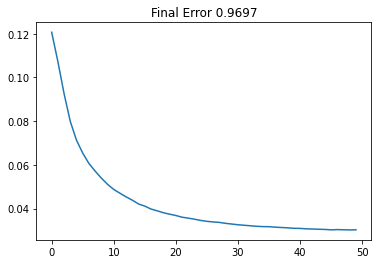

In [13]:
plt.close('all')

epoch = list(range(len(score['test']['merror'])))
ŷ = mxgb.predict(datt)
s = accuracy_score(yt, ŷ)

plt.plot(epoch, score['test']['merror'], label='test')
plt.title("Final Error %0.4f" % s)
plt.show()

In [14]:
cv_results = xgb.cv(dtrain=dat, params=p,
                    nfold=7,
                    num_boost_round=5,
                    metrics="merror",
                    verbose_eval=True,
                    as_pandas=True)

[0]	train-merror:0.11577+0.00165	test-merror:0.12936+0.00234
[1]	train-merror:0.09731+0.00147	test-merror:0.11532+0.00194
[2]	train-merror:0.07492+0.00068	test-merror:0.09895+0.00155
[3]	train-merror:0.05460+0.00032	test-merror:0.08527+0.00171
[4]	train-merror:0.04085+0.00045	test-merror:0.07593+0.00161


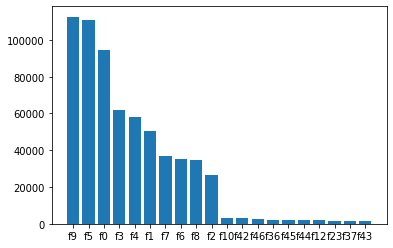

In [38]:
import operator

importance = dict(reversed(sorted(mxgb.get_score().items(), key=operator.itemgetter(1))))

# clear old visualizations
plt.close('all')

# visualize the points
fig, ax = plt.subplots()
plt.bar(list(importance.keys())[0:20], list(importance.values())[0:20])
plt.show()

In [41]:
# we can reduce the dataset by 80% and achieve a similar score

x, xt, y, yt = train_test_split(covtype.data[:,[9,5,0,3,4,1,7,6,8,2]], covtype.target, test_size = 0.20)

In [42]:
p = {'objective':'multi:softmax',
     'eta':0.2,
     'max_depth':30,
     'num_class':9,
     'eval_metric':'merror',
     'nthread':'32'}

# XGBoost wants the data serialized into a data structure called Dmatrix
dat = xgb.DMatrix(x, label=y)
datt = xgb.DMatrix(xt, label=yt)
watch = [(dat, 'train'), (datt, 'test')]
score = {}

mxgb = xgb.train(p, dat, 50, watch, evals_result=score)

[0]	train-merror:0.04798	test-merror:0.09080
[1]	train-merror:0.02670	test-merror:0.06837
[2]	train-merror:0.01724	test-merror:0.06008
[3]	train-merror:0.01217	test-merror:0.05469
[4]	train-merror:0.00863	test-merror:0.05145
[5]	train-merror:0.00643	test-merror:0.04928
[6]	train-merror:0.00488	test-merror:0.04703
[7]	train-merror:0.00360	test-merror:0.04545
[8]	train-merror:0.00272	test-merror:0.04398
[9]	train-merror:0.00202	test-merror:0.04270
[10]	train-merror:0.00148	test-merror:0.04159
[11]	train-merror:0.00108	test-merror:0.04088
[12]	train-merror:0.00080	test-merror:0.04019
[13]	train-merror:0.00059	test-merror:0.03952
[14]	train-merror:0.00044	test-merror:0.03889
[15]	train-merror:0.00032	test-merror:0.03833
[16]	train-merror:0.00024	test-merror:0.03800
[17]	train-merror:0.00019	test-merror:0.03738
[18]	train-merror:0.00013	test-merror:0.03681
[19]	train-merror:0.00011	test-merror:0.03651
[20]	train-merror:0.00009	test-merror:0.03607
[21]	train-merror:0.00007	test-merror:0.0357

In [45]:
ŷ = mxgb.predict(datt)
accuracy_score(yt, ŷ)

0.9681935922480487